In [2]:
import json

import networkx as nx

## Undirected Hypergraph

In [27]:
def add_node_to_edge(G: nx.DiGraph, edge, node):
    G.add_node(edge, bipartite=1)
    G.add_node(node, bipartite=0)
    G.add_edge(edge, node)


def add_attrs(G: nx.DiGraph, edge_or_node, attrs):
    for attr_key, attr_value in attrs.items():
        G.nodes[edge_or_node][attr_key] = attr_value


def read_hif(path):
    with open(path) as file:
        data = json.loads(file.read())
    G = nx.DiGraph()
    for record in data["incidences"]:
        n = record["node"]
        e = record["edge"]
        add_node_to_edge(G, e, n)
    for record in data["nodes"]:
        n = record["node"]
        attrs = record["attr"]
        add_attrs(G, n, attrs)
    return G


G_hif = read_hif("data/email-enron.json")

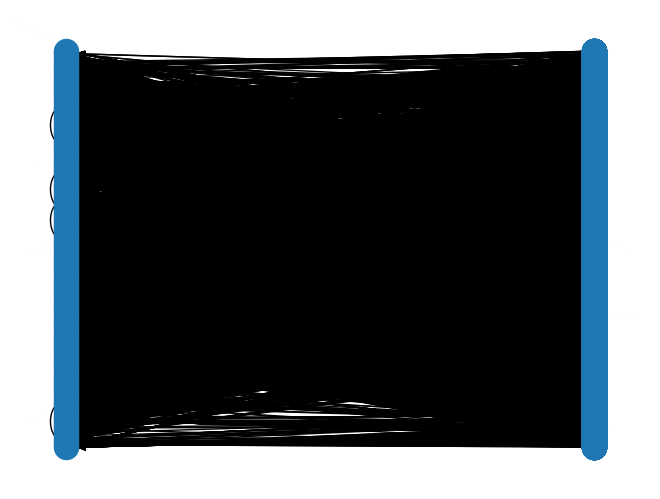

In [33]:
pos = nx.bipartite_layout(
    G_hif, {n for n, d in G_hif.nodes(data=True) if d["bipartite"] == 0}
)
nx.draw(G_hif, pos=pos)

In [26]:
# get all the email addresses for every node
{n: d["name"] for n, d in G_hif.nodes(data=True) if d["bipartite"] == 0}

{'4': 'robert.badeer@enron.com',
 '1': 'phillip.allen@enron.com',
 '129': 'fletcher.sturm@enron.com',
 '117': 'hunter.shively@enron.com',
 '2': 'john.arnold@enron.com',
 '51': 'keith.holst@enron.com',
 '3': 'harry.arora@enron.com',
 '41': 'mike.grigsby@enron.com',
 '5': 'susan.bailey@enron.com',
 '6': 'eric.bass@enron.com',
 '7': 'don.baughman@enron.com',
 '65': 'matthew.lenhart@enron.com',
 '8': 'sally.beck@enron.com',
 '9': 'robert.benson@enron.com',
 '107': 'monique.sanchez@enron.com',
 '11': 'sandra.brawner@enron.com',
 '12': 'rick.buy@enron.com',
 '122': 'steven.south@enron.com',
 '13': 'larry.campbell@enron.com',
 '14': 'mike.carson@enron.com',
 '15': 'michelle.cash@enron.com',
 '29': 'frank.ermis@enron.com',
 '17': 'shelley.corman@enron.com',
 '62': 'tori.kuykendall@enron.com',
 '133': 'jane.tholt@enron.com',
 '18': 'sean.crandall@enron.com',
 '19': 'martin.cuilla@enron.com',
 '20': 'jeff.dasovich@enron.com',
 '21': 'dana.davis@enron.com',
 '22': 'craig.dean@enron.com',
 '23': '